<a href="https://colab.research.google.com/github/Shubham080997/TED_VIEWS-/blob/main/TED_VIEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over
4,000 TED talks including transcripts in many languages.
Founded in 1984 by Richard Salman as a nonprofit organization
that aimed at bringing experts from the fields of Technology, Entertainment, and Design
together, TED Conferences have gone on to become the Mecca of ideas from virtually all
walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000
talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore,
Jimmy Wales, Shahrukh Khan, and Bill Gates.
The main objective is to build a predictive model, which could help in predicting the views of
the videos uploaded on the TEDx website.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline   
import ast  
sns.set(color_codes=True)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ted_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Module 5/Week 2/Day 1/data_ted_talks.csv')

In [4]:
ted_df

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society

In [5]:
ted_df.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


In [6]:
ted_df.keys()

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

We can drop few unimportant columns which are not important to us
1. title
2. url
3. talk_id


In [7]:
ted_df = ted_df.drop(['talk_id','url','title'], axis=1)



In [8]:
ted_df.shape

(4005, 16)

In [9]:
print(ted_df.isnull().sum())

speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
description         0
transcript          0
dtype: int64


In [10]:
ted_df= ted_df.dropna()    # Dropping the missing values.
ted_df.count()

speaker_1         3338
all_speakers      3338
occupations       3338
about_speakers    3338
views             3338
recorded_date     3338
published_date    3338
event             3338
native_lang       3338
available_lang    3338
comments          3338
duration          3338
topics            3338
related_talks     3338
description       3338
transcript        3338
dtype: int64

Getting the boxplot for all numerical values

We can see that it is completely right skewed

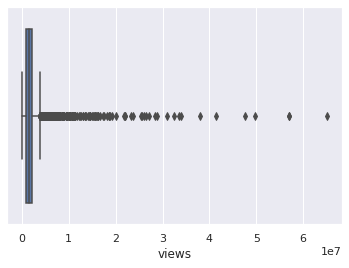

In [11]:
sns.boxplot(x=ted_df['views'])

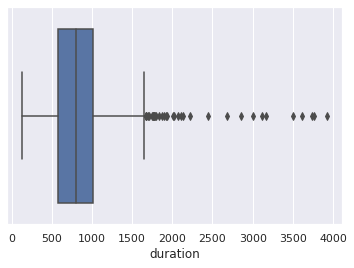

In [12]:
sns.boxplot(x=ted_df['duration'])

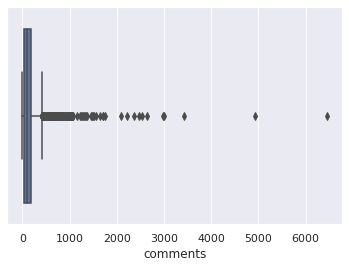

In [13]:
sns.boxplot(x=ted_df['comments'])

In [14]:
ted_df['description']

0       With the same humor and humanity he exuded in ...
1       You've never seen data presented like this. Wi...
2       New York Times columnist David Pogue takes aim...
3       In an emotionally charged talk, MacArthur-winn...
4       Sir Ken Robinson makes an entertaining and pro...
                              ...                        
3994    When it comes to big life problems, we often s...
3995    If you had to explain to a newborn what it mea...
3999    Examining the facts and figures of the coronav...
4000    What if we could help people in crisis anytime...
4002    Many countries have an active, centuries-old l...
Name: description, Length: 3338, dtype: object

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],

We also need convert the date column values in order to make more sense of data in further analysis. The date column contains values in Unix timestamp format, we will convert it into date time format.

In [15]:
from datetime import datetime
def convert(x):
    return pd.to_datetime(x)
ted_df['recorded_date'] = ted_df['recorded_date'].apply(convert)
ted_df['published_date'] = ted_df['published_date'].apply(convert)
ted_df.head(1)


,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript
0,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."


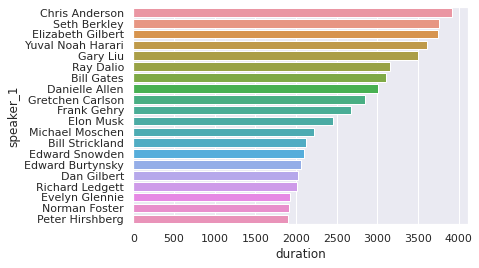

In [16]:
#Lets see who talked a lot - top 20
import seaborn as sns
ax = sns.barplot(x="duration", y="speaker_1", data=ted_df.sort_values('duration', ascending=False)[:20])

Chris Anderson has longest duration.

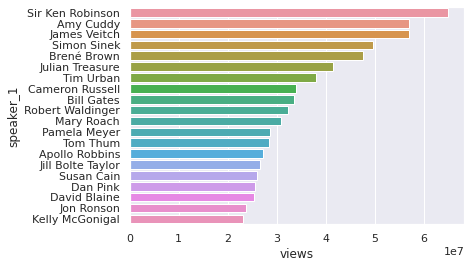

In [17]:
#Let's see which video got the most views
ax = sns.barplot(x="views", y="speaker_1", data=ted_df.sort_values('views', ascending=False)[:20])


Sir Ken has the largest views

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


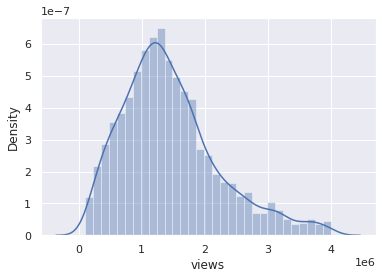

In [18]:
#let's see the distribution of views
sns.distplot(ted_df[ted_df['views'] < 4000000]['views'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


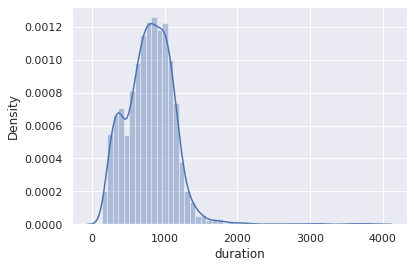

In [19]:
#let's see the distribution of duration
sns.distplot(ted_df[ted_df['duration'] < 4000000]['duration'])

In [20]:
talk_month = pd.DataFrame(ted_df['recorded_date'].map(lambda x: x.month).value_counts()).reset_index()
talk_month.columns = ['month', 'talks']
talk_month

,month,talks
0,2,611
1,3,423
2,4,408
3,11,395
4,6,308
5,7,297
6,10,255
7,12,193
8,9,162
9,5,151


In [21]:
talk_month = pd.DataFrame(ted_df['published_date'].map(lambda x: x.month).value_counts()).reset_index()
talk_month.columns = ['month', 'talks']
talk_month

,month,talks
0,4,327
1,10,314
2,3,313
3,2,297
4,1,291
5,9,287
6,5,280
7,6,276
8,11,272
9,7,246


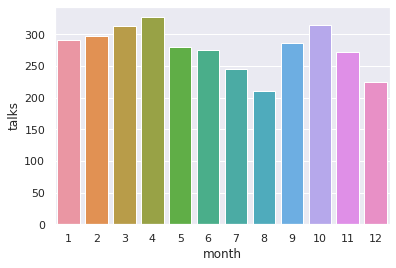

In [22]:
sns.barplot(x='month', y='talks', data=talk_month)

# Views vs Relation

In [23]:
plt.style.use('seaborn-whitegrid')

In [24]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

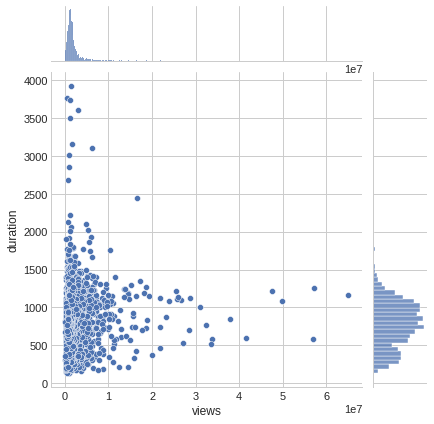

In [25]:
sns.jointplot(x='views', y='duration', data=ted_df)

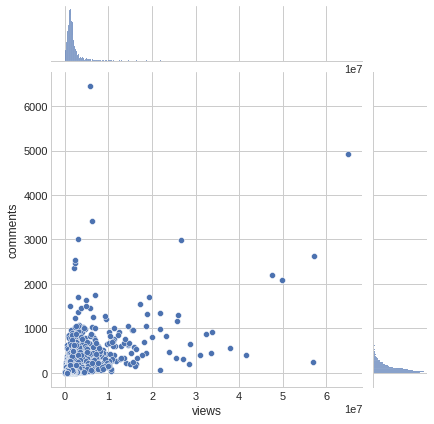

In [26]:
sns.jointplot(x='views', y='comments', data=ted_df)

In [ ]:
#comments vs. View Counts
f, ax = plt.subplots(figsize = (8,6))
sns.regplot(data=ted_df,x='comments',y='views')
plt.title("Relationship Between Comments and View Count", fontsize = 16)
plt.ylabel("Number of Views: Ten Millions ", fontsize = 14)
plt.xlabel("Number of Comments", fontsize = 14)

Getting the unique features in event category
There are lots of unique feature i.e 428 which needs to be grouped in one.

In [27]:
print('Number of unique events: ',ted_df['event'].unique().shape[0])
ted_df['event'].unique()

Number of unique events:  428


array(['TED2006', 'TED2004', 'TED2005', 'TEDGlobal 2005', 'TEDSalon 2006',
       'TED2003', 'TED2007', 'TED2002', 'TEDGlobal 2007', 'TED2001',
       'TEDSalon 2007 Hot Science', 'Skoll World Forum 2007', 'TED2008',
       'TED1984', 'TED1990', 'DLD 2007', 'EG 2007', 'TED1998',
       'LIFT 2007', 'TED Prize Wish', 'TEDSalon 2009 Compassion',
       'Chautauqua Institution', 'Serious Play 2008', 'Taste3 2008',
       'TED in the Field', 'TED2009', 'EG 2008',
       'Elizabeth G. Anderson School', 'TEDxUSC', 'TED@State',
       'TEDGlobal 2009', 'TEDxKC', 'TEDIndia 2009',
       'TEDSalon London 2009', 'TEDxTC', 'TEDMED 2009', 'TEDxSMU',
       'TEDxBoston 2009', 'TEDxBerlin', 'TED2010', 'TEDxAmsterdam',
       'TEDxNASA', 'Mission Blue Voyage', 'TEDxPuget Sound', 'TEDxNYED',
       'TEDSalon London 2010', 'TEDxEdmonton', 'TED@Cannes',
       'TEDxAtlanta', 'TEDxEast', 'TEDxOilSpill', 'TEDGlobal 2010',
       'TEDxBoston 2010', 'Business Innovation Factory', 'TEDxYYC',
       'TEDxChan

In [28]:
#Create column with default value of "Other"
ted_df['event_class'] = 'Other'


In [ ]:
#introducing a new column called event category
ted_df['event_category'] = 'Other'
#categorising each record into the new event_category column according to their event
for i in range(len(ted_df)):
  if ted_df['event'][i][0:5]=='TED20':
    ted_df['event_category'][i] = 'TED2000s'
  elif ted_df['event'][i][0:6]=='TED-Ed':
    ted_df['event_category'][i] = 'TED-Ed'
  elif ted_df['event'][i][0:5]=='TED19':
    ted_df['event_category'][i] = 'TED1900s'
  elif ted_df['event'][i][0:4]=='TEDx':
    ted_df['event_category'][i] = "TEDx"
  elif ted_df['event'][i][0:7]=='TED@BCG':
    ted_df['event_category'][i] = 'TED@BCG'
  elif ted_df['event'][i][0:4]=='TED@':
    ted_df['event_category'][i] = "TED@"
  elif ted_df['event'][i][0:8]=='TEDSalon':
    ted_df['event_category'][i] = "TEDSalon"
  elif ted_df['event'][i][0:9]=='TEDGlobal':
    ted_df['event_category'][i] = 'TEDGlobal'
  elif ted_df['event'][i][0:8]=='TEDWomen':
    ted_df['event_category'][i] = 'TEDWomen'
  elif ted_df['event'][i][0:6]=='TEDMED':
    ted_df['event_category'][i] = 'TEDMED'
  elif ted_df['event'][i][0:3]=='TED':
    ted_df['event_category'][i] = 'TEDOther'

In [37]:
ted_df['event_class'].unique()

array(['TED2000s', 'TEDGlobal', 'TEDSalon', 'Other', 'TED1900s',
       'TEDOther', 'TEDx', 'TED@', 'TEDMED', 'TEDWomen'], dtype=object)

# Related TALKS


We are interested in using the amount of views that the related talks have. To get this feature we will create a new column that shows the mean number of views from all the related talks listed for a given talk.

In [40]:
ted_df['related_talks']

0       {243: 'New thinking on the climate crisis', 54...
1       {2056: "Own your body's data", 2296: 'A visual...
2       {1725: '10 top time-saving tech tips', 2274: '...
3       {1041: '3 stories of local eco-entrepreneurshi...
4       {865: 'Bring on the learning revolution!', 173...
                              ...                        
3994    {2480: 'The inside story of the Paris climate ...
3995    {44696: 'You are not alone in your loneliness'...
3999    {58: 'My wish: Help me stop pandemics', 61303:...
4000    {2362: 'How data from a crisis text line is sa...
4002    {2406: 'I love being a police officer, but we ...
Name: related_talks, Length: 3338, dtype: object

In [30]:
ted_df['topics'].head

<bound method NDFrame.head of 0       ['alternative energy', 'cars', 'climate change...
1       ['Africa', 'Asia', 'Google', 'demo', 'economic...
2       ['computers', 'entertainment', 'interface desi...
3       ['MacArthur grant', 'activism', 'business', 'c...
4       ['children', 'creativity', 'culture', 'dance',...
                              ...                        
3994    ['climate change', 'choice', 'leadership', 'so...
3995    ['Planets', 'art', 'poetry', 'life', 'love', '...
3999    ['coronavirus', 'pandemic', 'epidemiology', 'v...
4000    ['activism', 'data', 'technology', 'mental hea...
4002    ['society', 'law', 'policy', 'justice system',...
Name: topics, Length: 3338, dtype: object>

Each observation contains a list of topics contained in a string ,we will destring the lists so that we can work with the data. We will conveniently name the new column "Topics".

In [31]:
ted_df['topics'][1]


"['Africa', 'Asia', 'Google', 'demo', 'economics', 'global issues', 'health', 'statistics', 'global development', 'visualizations', 'math']"

In [69]:
ted_df['viewed_count'] = 0
for ii in range(len(ted_df)):
#Remove string
 # less = ast.literal_eval(ted_df['related_talks'][ii])
  related_views = []
  for ll in range(len(less)):
#Add view counts for each related talk into list
   #related_views.append(less[ll]['viewed_count'])
    ted_df[['related_views']][ii] = np.mean(related_views)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Each tag contains a list of string contained in topic, our main objective is to destring the list so that we can work on the data

In [54]:
from gensim.test.utils import datapath
# Load a word2vec model stored in the C *text* format.
model = KeyedVectors.load_word2vec_format(datapath('word2vec_pre_kv_c'), binary=False)
# Load a word2vec model stored in the C *binary* format.
model2 = KeyedVectors.load_word2vec_format(datapath("euclidean_vectors.bin"), binary=True)

In [45]:
listed = [item for sublist in destring for item in sublist]
listed = pd.Series(listed)
lists = list(listed.unique())
lists2 = [ x for x in lists if " " not in x ]
lists2 = [ x for x in lists2 if "-" not in x ]

In [ ]:
lists2